# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [64]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [18]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/pardeepkumar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


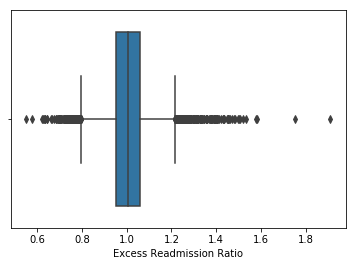

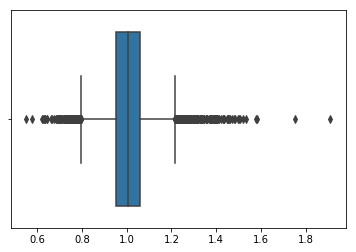

In [39]:
xx = clean_hospital_read_df['Number of Discharges']
yy = clean_hospital_read_df['Excess Readmission Ratio']
sns.boxplot(yy)
plt.show()
sns.boxplot(y)
plt.show()

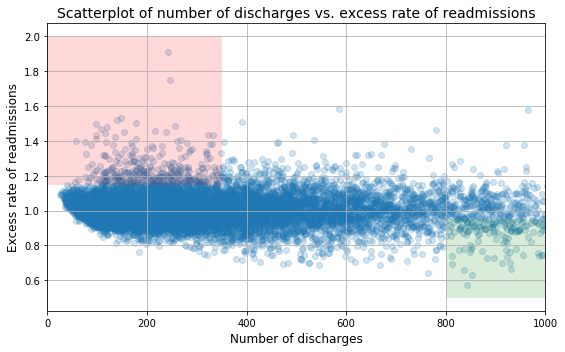

In [43]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)


ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 1000])
#ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [41]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [80]:
# Your turn

Just from the plot, the net impact of number if discharges on the readmission rate seems to be neglibigle. The overall mean readmission rate is about 1.01, still higher then 1.0 theshold.

### NULL HYPOTHESIS
There is no difference in the average rate of readmissions between hospitals with # discharges < 100 or hospitals with # discharges > 1000.

### ALTERNATIVE HYPOTHESIS
There is a significant difference in average hospital readmission rates in hospitals with less than 100 discharges and greater than 1000 discharges

#### Significance level
Because of large amount of data, the significane level is set at 1%. If the p-value is less than 0.01 we will reject the null hypothesis

In [85]:
# Convert the lists into arrays
# Number of discharges
xarr = np.array(x)

# Rate of Readmission
yarr = np.array(y)

# Significance Level
alpha = 0.01

In [86]:
from scipy import stats

# Since we do not know the population stanaded deviation we will perform Welch's test (set equal_var = False)

tval, pval = stats.ttest_ind(yarr[xarr<100],yarr[xarr>1000], equal_var = False)

print('Value of t-statistics: %0.4f' %tval)

if pval < alpha:
    print('\n p-value %0.3f'% pval,' suggests that null hypothesis can be rejected.')
else:
    print('\n p-value %0.3f'% pval,' suggests that null hypothesis cannot be rejected.')

Value of t-statistics: 7.4901

 p-value 0.000  suggests that null hypothesis can be rejected.


Based on the hypothesis test results we can reject the null hypothesis.

Note that null hypothesis is sensitive to the size of data have. With large sample size, the POWER of the hypothesis test increases and thus increasing the chances of Type 1 error if the null hypothesis is true.

The practical significance just based on one parameter is not a recommended approach. 

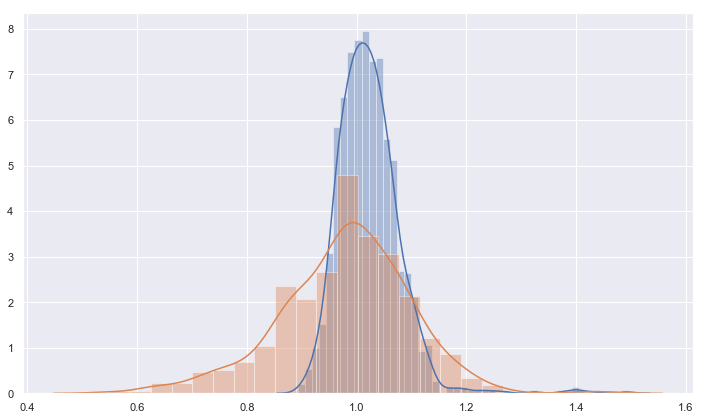

In [88]:
plt.figure(figsize=(12, 7))
_ = sns.distplot(yarr[xarr<100])
_ = sns.distplot(yarr[xarr>1000])

In [90]:
# Function to Draw bootstrap samples for simulations
def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates.
    input:
    data = 1D array
    func = function that computes the test statistics
    size = # of simulations
    output:
    bs_replicates = test statistics from each simulation
    """
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [95]:
# Compute 10,000 bootstrap replicates from shifted arrays
n_sim = 10000  

# Number of discharges < 100
bs_replicates_small = draw_bs_reps(yarr[xarr<100] , np.mean, n_sim)

# Number of discharges > 1000
bs_replicates_large = draw_bs_reps(yarr[xarr>1000] , np.mean, n_sim)

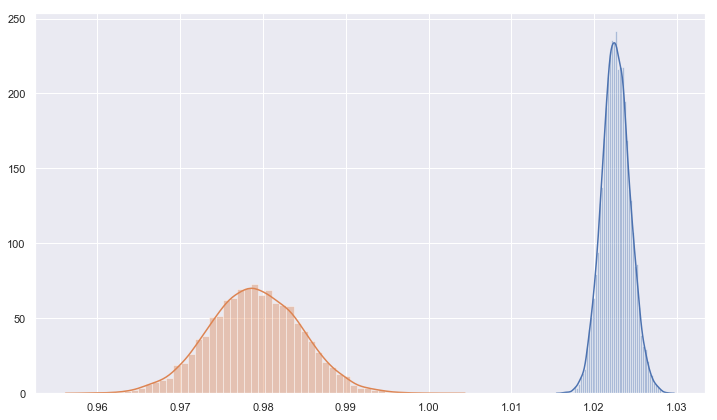

In [96]:
plt.figure(figsize=(12, 7))
_ = sns.distplot(bs_replicates_small)
_ = sns.distplot(bs_replicates_large )

Just looking at the two distributions we see that they are not sampled from the same population data and thus null hypothesis can ve rejected.